# Compare

In [ ]:
# import pandas as pd

# df = pd.read_csv('/Users/rishabhshah/Desktop/Bergin Group/DataAnalysis/testing/UB04 monitoring station data.csv')

In [29]:
import pandas as pd

numeric_columns = ['time_stamp','temperature','humidity','pm2.5_alt','pressure']

sensor_177785_data = pd.read_csv('PurpleAir cloud data 177785 2023-11-16 2024-01-31 10-Minute Average.csv')[numeric_columns]
reference_monitor_data = pd.read_csv('UB04 monitoring station data.csv')
reference_monitor_data.rename(columns={'T_Rs':'temperature',
                                        'RH_Rs':'humidity',
                                        'P25_Rs':'pm2.5_alt',
                                        'AP_Rs':'pressure',
                                        'Unnamed: 0':'time_stamp'
                                       }, inplace=True)
reference_monitor_data = reference_monitor_data[numeric_columns]

In [30]:
reference_monitor_data.columns

Index(['time_stamp', 'temperature', 'humidity', 'pm2.5_alt', 'pressure'], dtype='object')

In [31]:
reference_monitor_data.loc[:, 'time_stamp'] = pd.to_datetime(reference_monitor_data['time_stamp'], errors='coerce')
reference_monitor_data = reference_monitor_data.dropna(subset=['time_stamp'])
reference_monitor_data.dtypes

time_stamp     object
temperature    object
humidity       object
pm2.5_alt      object
pressure       object
dtype: object

In [32]:
sensor_177785_data = sensor_177785_data.astype('object')

# Ensure 'time_stamp' column is in datetime format
sensor_177785_data['time_stamp'] = pd.to_datetime(sensor_177785_data['time_stamp'])

# Add 8 hours to 'time_stamp' column
sensor_177785_data['time_stamp'] = sensor_177785_data['time_stamp'] + pd.Timedelta(hours=8)

# Convert 'time_stamp' column to string format
sensor_177785_data['time_stamp'] = sensor_177785_data['time_stamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

sensor_177785_data.dtypes

time_stamp     object
temperature    object
humidity       object
pm2.5_alt      object
pressure       object
dtype: object

In [33]:
# ## Merge test
# # Ensure 'time_stamp' column in both DataFrames is in datetime format
# sensor_177785_data['time_stamp'] = pd.to_datetime(sensor_177785_data['time_stamp'])
# reference_monitor_data['time_stamp'] = pd.to_datetime(reference_monitor_data['time_stamp'])

# # Perform the join operation
# merged_data = sensor_177785_data.merge(reference_monitor_data, on='time_stamp', how='left')


# merged_data.dropna()

In [ ]:
import os

# parameters_dir = os.path.join("parameters")
parameters_dir = os.path.join("/Users/rishabhshah/Desktop/Bergin Group/DataAnalysis/testing/parameters_1_120/")


cleaned_sensor_dataframes = [sensor_177785_data]

working_columns = ['temperature','humidity','pm2.5_alt','pressure']
target_sensor = 'mnums 103'
# target_sensor = 'MNUMS34'
# Apply parameters to each dataframe and each column
for sensor_df in cleaned_sensor_dataframes:
    for column_name in working_columns:
        coefficients_file = os.path.join(parameters_dir, f"{column_name.lower().replace(' ', '_')}_coefficients_df.csv")
        coefficients_df = pd.read_csv(coefficients_file)
        for index, row in coefficients_df.iterrows():
            # print(coefficients_df[coefficients_df['Sensor']==target_sensor])
            coefficient, intercept = coefficients_df[coefficients_df['Sensor'] == target_sensor].values[0][1], coefficients_df[coefficients_df['Sensor'] == target_sensor].values[0][2]

            # sensor_df[column_name] = sensor_df[column_name] * coefficients_df[coefficients_df['Sensor']==target_sensor]['Coefficient'].values[0] + coefficients_df[coefficients_df['Sensor']==target_sensor]['Intercept'].values[0]
            sensor_df[column_name] = sensor_df[column_name] * coefficient + intercept


In [35]:
#   Sensor  Coefficient  Intercept
# 39  mnums 103     0.115388  80.305482
#        Sensor  Coefficient  Intercept
# 39  mnums 103     0.599406   8.218362
#        Sensor  Coefficient  Intercept
# 39  mnums 103     0.397509   2.296555
#        Sensor  Coefficient   Intercept
# 39  mnums 103     0.613255  333.094961

In [36]:
def f(x):
    x = (x - 32) * 5/9
    return x

sensor_df['temperature'] = sensor_df['temperature'].apply(f)

In [37]:
# Ensure 'time_stamp' column in both DataFrames is in datetime format
sensor_df['time_stamp'] = pd.to_datetime(sensor_df['time_stamp'])
reference_monitor_data['time_stamp'] = pd.to_datetime(reference_monitor_data['time_stamp'])

# Perform the join operation
merged_data = sensor_df.merge(reference_monitor_data, on='time_stamp', how='left', suffixes=('_sensor', '_reference_monitor'))

merged_data[['temperature_sensor', 'humidity_sensor', 'pm2.5_alt_sensor',
       'pressure_sensor', 'temperature_reference_monitor', 'humidity_reference_monitor', 'pm2.5_alt_reference_monitor',
       'pressure_reference_monitor']] = merged_data[['temperature_sensor', 'humidity_sensor', 'pm2.5_alt_sensor',
       'pressure_sensor', 'temperature_reference_monitor', 'humidity_reference_monitor', 'pm2.5_alt_reference_monitor',
       'pressure_reference_monitor']].apply(pd.to_numeric)

merged_data = merged_data.dropna()
merged_data.head()

,time_stamp,temperature_sensor,humidity_sensor,pm2.5_alt_sensor,pressure_sensor,temperature_reference_monitor,humidity_reference_monitor,pm2.5_alt_reference_monitor,pressure_reference_monitor
11,2023-11-29 11:30:00,-8.111111,25.2,6.8,883.038,-14.8,52.0,14.0,882.0
14,2023-11-29 12:00:00,-11.333333,33.8,5.2,883.180,-14.4,50.0,30.0,882.0
17,2023-11-29 12:30:00,-9.666667,33.8,5.1,883.396,-14.8,52.0,42.0,882.0
20,2023-11-29 13:00:00,-10.222222,33.2,2.2,883.648,-14.2,50.0,40.0,882.0
23,2023-11-29 13:30:00,-11.000000,35.0,1.6,883.794,-14.2,49.0,39.0,882.0


In [38]:
reference_monitor_data.head()

,time_stamp,temperature,humidity,pm2.5_alt,pressure
1,2023-11-28 00:15:00,-17,65,83,871
2,2023-11-28 00:30:00,-16.9,65,83,871
3,2023-11-28 00:45:00,-17.1,65,83,871
4,2023-11-28 01:00:00,-16.9,65,73,871
5,2023-11-28 01:15:00,-17.1,65,67,871


In [39]:
merged_data = merged_data[merged_data['time_stamp'] < '2023-12-08']

merged_data

,time_stamp,temperature_sensor,humidity_sensor,pm2.5_alt_sensor,pressure_sensor,temperature_reference_monitor,humidity_reference_monitor,pm2.5_alt_reference_monitor,pressure_reference_monitor
11,2023-11-29 11:30:00,-8.111111,25.2,6.8,883.038,-14.8,52.0,14.0,882.0
14,2023-11-29 12:00:00,-11.333333,33.8,5.2,883.180,-14.4,50.0,30.0,882.0
17,2023-11-29 12:30:00,-9.666667,33.8,5.1,883.396,-14.8,52.0,42.0,882.0
20,2023-11-29 13:00:00,-10.222222,33.2,2.2,883.648,-14.2,50.0,40.0,882.0
23,2023-11-29 13:30:00,-11.000000,35.0,1.6,883.794,-14.2,49.0,39.0,882.0
...,...,...,...,...,...,...,...,...,...
1221,2023-12-07 21:30:00,-3.888889,47.0,3.3,852.008,-7.2,61.0,24.0,849.0
1224,2023-12-07 22:00:00,-5.000000,46.0,4.4,852.838,-7.8,61.0,20.0,850.0
1227,2023-12-07 22:30:00,-6.000000,47.0,4.4,853.500,-8.3,60.0,18.0,850.0
1230,2023-12-07 23:00:00,-6.666667,47.0,4.9,854.470,-8.5,57.0,18.0,851.0


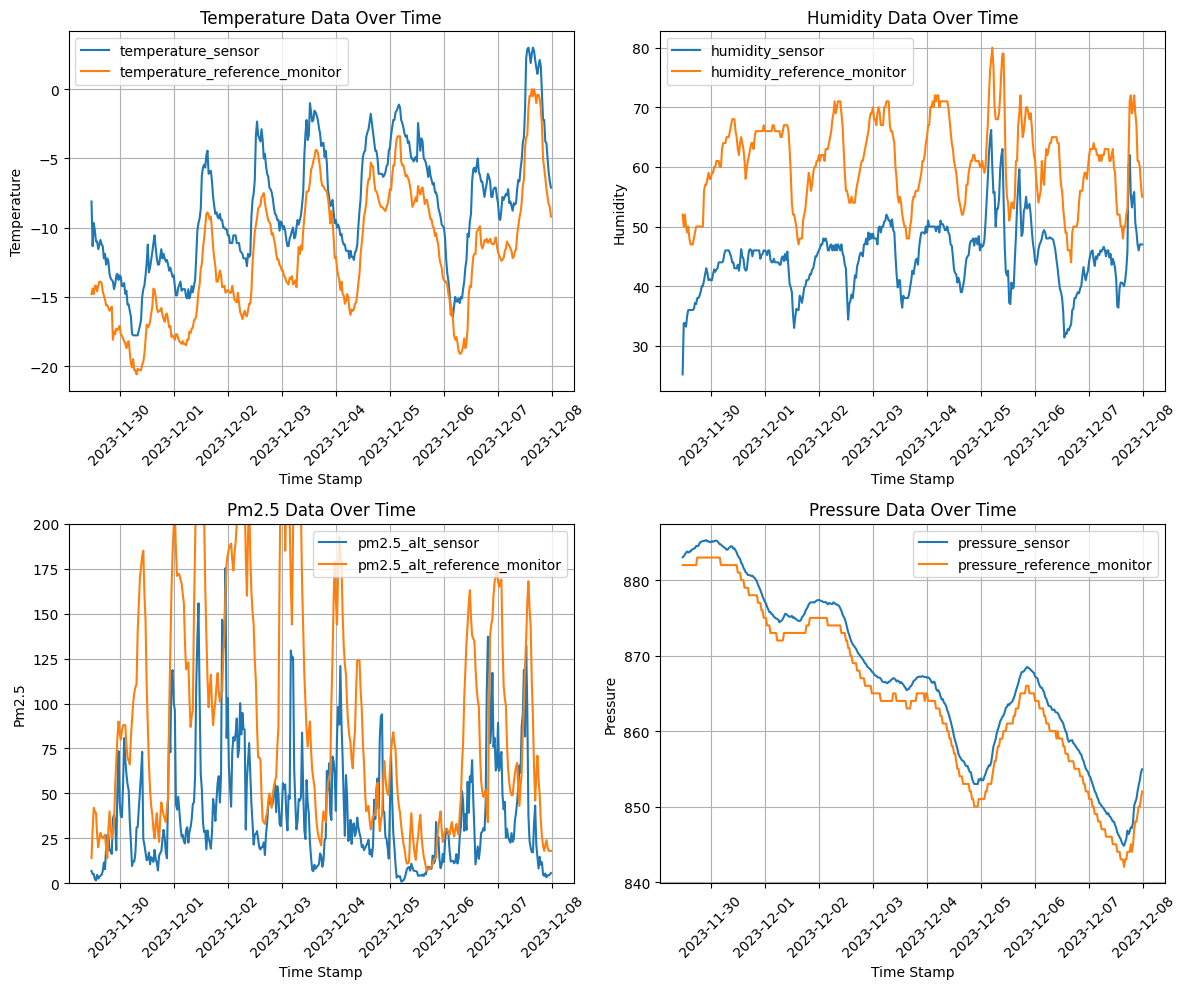

In [40]:
import matplotlib.pyplot as plt
import pandas as pd


# merged_data = pd.DataFrame(data)

# Convert 'time_stamp' to datetime
merged_data['time_stamp'] = pd.to_datetime(merged_data['time_stamp'])

# List of column pairs to plot
column_pairs = [
    ('temperature_sensor', 'temperature_reference_monitor'),
    ('humidity_sensor', 'humidity_reference_monitor'),
    ('pm2.5_alt_sensor', 'pm2.5_alt_reference_monitor'),
    ('pressure_sensor', 'pressure_reference_monitor')
]


# Create a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each pair of columns in the respective subplot
for i, (col_x, col_y) in enumerate(column_pairs):
    axs[i].plot(merged_data['time_stamp'], merged_data[col_x], label=f'{col_x}')
    axs[i].plot(merged_data['time_stamp'], merged_data[col_y], label=f'{col_y}')
    axs[i].set_xlabel('Time Stamp')
    axs[i].set_ylabel(col_x.split('_')[0].capitalize())
    axs[i].set_title(f'{col_x.split("_")[0].capitalize()} Data Over Time')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)
    # print(column_pairs[0])
    if col_x == 'pm2.5_alt_sensor':
        axs[i].set_ylim(0, 200)  # Cap the y-axis to 200

plt.tight_layout()
plt.show()

In [ ]:
# data = merged_data.resample('24h', on='time_stamp').mean()
# data

data = merged_data

# data = merged_data[merged_data['pm2.5_alt_y'] < 200]

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
r_value, _ = pearsonr(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])

print(f"Pearson correlation coefficient (r value) between pm2.5_alt_sensor and pm2.5_alt_reference_monitor: {r_value}")

In [ ]:
import matplotlib.pyplot as plt

data = merged_data.resample('8h', on='time_stamp').mean()

r_value, _ = pearsonr(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])

print(f"Pearson correlation coefficient (r value) between pm2.5_alt_sensor and pm2.5_alt_reference_monitor: {r_value}")

# plot pm2.5_alt_x vs pm2.5_alt_y
plt.figure(figsize=(6, 8))
plt.scatter(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])
plt.xlabel('pm2.5_alt_sensor')
plt.ylabel('pm2.5_alt_reference_monitor')
plt.title('pm2.5_alt_sensor vs pm2.5_alt_reference_monitor')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

data = merged_data.resample('12h', on='time_stamp').mean()

r_value, _ = pearsonr(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])

print(f"Pearson correlation coefficient (r value) between pm2.5_alt_sensor and pm2.5_alt_reference_monitor: {r_value}")


# plot pm2.5_alt_x vs pm2.5_alt_y
plt.figure(figsize=(6, 8))
plt.scatter(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])
plt.xlabel('pm2.5_alt_sensor')
plt.ylabel('pm2.5_alt_reference_monitor')
plt.title('pm2.5_alt_sensor vs pm2.5_alt_reference_monitor')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

data = merged_data.resample('24h', on='time_stamp').mean()

r_value, _ = pearsonr(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])

print(f"Pearson correlation coefficient (r value) between pm2.5_alt_sensor and pm2.5_alt_reference_monitor: {r_value}")

# plot pm2.5_alt_x vs pm2.5_alt_y
plt.figure(figsize=(6, 8))
plt.scatter(data['pm2.5_alt_sensor'], data['pm2.5_alt_reference_monitor'])
plt.xlabel('pm2.5_alt_sensor')
plt.ylabel('pm2.5_alt_reference_monitor')
plt.title('pm2.5_alt_sensor vs pm2.5_alt_reference_monitor')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(6, 8))
plt.scatter(data.index, data['pm2.5_alt_sensor'], color='blue', label='pm2.5_alt_x')
plt.scatter(data.index, data['pm2.5_alt_reference_monitor'], color='red', label='pm2.5_alt_reference_monitor')
plt.xlabel('Time Stamp')
plt.ylabel('PM2.5 Altitude')
plt.title('PM2.5 Altitude Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()